   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
140  141            6.7           3.1            5.6           2.4   
141  142     

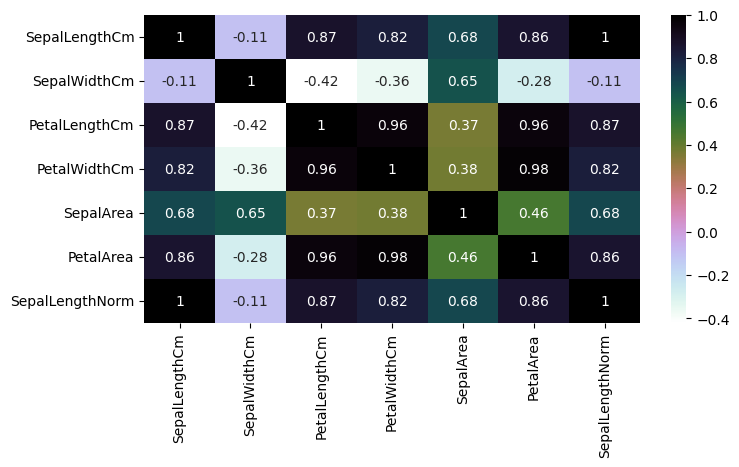

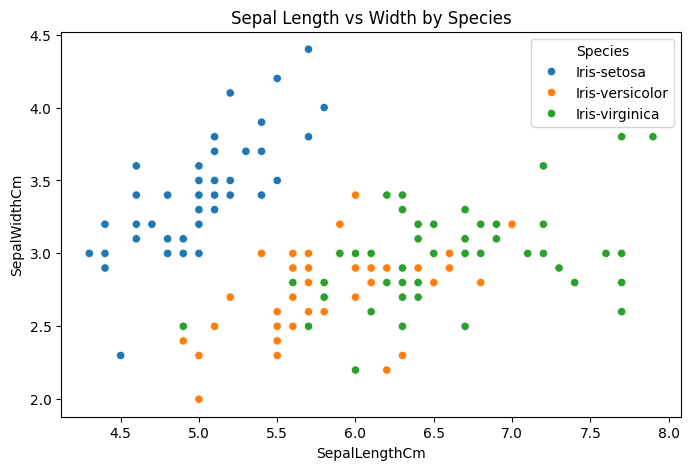

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

df = pd.read_csv(r"C:\Users\MRUGANK KAPSE\Downloads\Iris.csv")

print(df.head(10))
print(df.tail(10))
print(df.describe())
print(df)
print(df.info())
print(df.shape)
print(df.isnull().sum())

df = df.drop_duplicates()
if 'Id' in df.columns:
    df.drop(columns=['Id'], inplace=True)

df['SepalArea'] = df['SepalLengthCm'] * df['SepalWidthCm']
df['PetalArea'] = df['PetalLengthCm'] * df['PetalWidthCm']

sepal_length = df['SepalLengthCm'].to_numpy()
petal_length = df['PetalLengthCm'].to_numpy()

print(np.mean(sepal_length))
print(np.std(petal_length))
print(np.max(sepal_length))
print(np.min(petal_length))

df['SepalSize'] = np.where(
    df['SepalArea'] > df['SepalArea'].mean(),
    'Large',
    'Small'
)

print(df.groupby('Species').mean(numeric_only=True))

print(
    df.groupby('Species').agg({
        'SepalLengthCm': ['mean', 'min', 'max'],
        'PetalLengthCm': ['mean', 'std']
    })
)

df_sorted = df.sort_values(by='PetalLengthCm', ascending=False)
print(df_sorted.head())

df['SepalLengthNorm'] = (
    (df['SepalLengthCm'] - df['SepalLengthCm'].min()) /
    (df['SepalLengthCm'].max() - df['SepalLengthCm'].min())
)

large_sepal = df[df['SepalArea'] > df['SepalArea'].mean()]
print(large_sepal.head())

sample = df.sample(10, random_state=1)
print(sample)

X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")

plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='cubehelix_r')
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species')
plt.title("Sepal Length vs Width by Species")
plt.show()